In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(threshold=np.inf)
test_init = []
test = []

for i in range(1,21):
    # create feature array
    feature = cv2.imread('test_init/'+str(i)+'.png',cv2.IMREAD_GRAYSCALE)
    for x in range(feature.shape[0]):
        for y in range(feature.shape[1]):
            if(feature[x][y] >= 127):
                feature[x][y] = 0
            else:
                feature[x][y] = 1
    
    test_init.append(feature)
    
    # create label array
    label = cv2.imread('newtest/'+str(i)+'.png',cv2.IMREAD_GRAYSCALE)
    for x in range(label.shape[0]):
        for y in range(label.shape[1]):
            if(label[x][y] >= 127):
                label[x][y] = 0
            else:
                label[x][y] = 1
    test.append(label)
    


a = np.array(test_init).shape
b = np.array(test).shape
print(a)
print(b)
print(np.array(test_init))
#print(test_init)

(20, 240, 320)
(20, 240, 320)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [90]:
real_test_init = []

for i in range(1,21):
    # create feature array
    feature = cv2.imread('test/test'+str(i)+'_init.png',cv2.IMREAD_GRAYSCALE)
    for x in range(feature.shape[0]):
        for y in range(feature.shape[1]):
            if(feature[x][y] >= 127):
                feature[x][y] = 0
            else:
                feature[x][y] = 1
    
    real_test_init.append(feature)

In [152]:
crack = np.zeros((np.array(test).shape[0], np.array(test).shape[1], np.array(test).shape[2]), dtype=np.int)
for i in range(np.array(test).shape[0]):
    for x in range(np.array(test).shape[1]):
        for y in range(np.array(test).shape[2]):
            crack[i][x][y] = abs(test[i][x][y] - test_init[i][x][y])
            if crack[i][x][y] == 255:
                crack[i][x][y] = 1

np.array(crack).shape

C:\Users\liou7\anaconda3\envs\maskrcnn\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


(20, 240, 320)

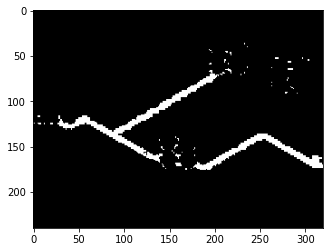

In [153]:
crack.shape
plt.imshow(crack[8], cmap='gray')

In [154]:
final_img = np.zeros((np.array(test).shape[0], np.array(test).shape[1], np.array(test).shape[2]), dtype=np.int)
for i in range(np.array(test).shape[0]):
    for x in range(np.array(test).shape[1]):
        for y in range(np.array(test).shape[2]):
            final_img[i][x][y] = real_test_init[i][x][y] + crack[i][x][y]
            if final_img[i][x][y] == 2:
                final_img[i][x][y] = 1

np.array(final_img).shape

(20, 240, 320)

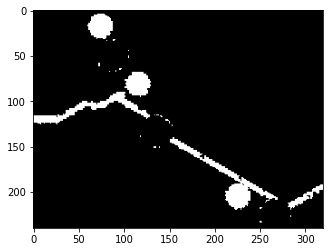

In [155]:
plt.imshow(final_img[19], cmap='gray')

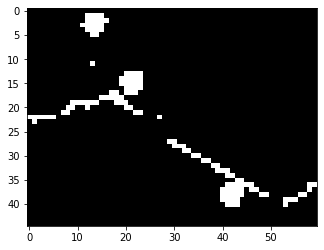

In [183]:
new_img = []
new_img_re = np.zeros((20,45, 60), dtype=np.uint8)
for i in range(20):
    new_img = final_img[i]
    new_img = new_img.astype('uint8')
    new_img_re[i] = cv2.resize(new_img,(60,45),interpolation = cv2.INTER_CUBIC)
    
np.array(new_img_re).shape   
plt.imshow(new_img_re[19], cmap='gray')

In [157]:
def trans_to_1array(img_array):
    array = []
    count = 0
    for i in range(0,np.array(img_array).shape[0]):
        for x in range(0,np.array(img_array).shape[1]):
             for y in range(0,np.array(img_array).shape[2]):
                if img_array[i][x][y] == 0:
                    array.append(0)
                else:
                    array.append(1)
                count += 1
    return array

In [158]:
final = trans_to_1array(new_img_re)
np.array(final).shape

(54000,)

In [149]:
import csv

count = 0
# 開啟輸出的 CSV 檔案
with open('output.csv', 'w', newline='') as csvfile:
  # 建立 CSV 檔寫入器
  writer = csv.writer(csvfile)

  # 寫入一列資料
  writer.writerow(['index', 'category'])

  # 寫入另外幾列資料
  
  
  for i in range(0,54000):
    writer.writerow([i,final[i]])